## Importing Python Modules

In [195]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler, FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion, make_union

In [196]:
sns.set_style('whitegrid')
# sns.set(context="paper", font="monospace")

## Data Loading 

In [197]:
def load_training_dataset():
    return pd.read_csv('data/train_LZdllcl.csv', index_col='employee_id')
df = load_training_dataset()
df = df.rename(columns={'KPIs_met >80%':'is_kpi_met', 'awards_won?':'has_won_awards'})
print('Train Data Size :', df.shape)
df.head()

Train Data Size : (54808, 13)


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,is_kpi_met,has_won_awards,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [198]:
test = pd.read_csv('data/test_2umaH9m.csv', index_col='employee_id')
test = test.rename(columns={'KPIs_met >80%':'is_kpi_met', 'awards_won?':'has_won_awards'})
print('Test Data Size :', test.shape)
test.head()

Test Data Size : (23490, 12)


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,is_kpi_met,has_won_awards,avg_training_score
employee_id,,,,,,,,,,,,
8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [199]:
test.isnull().sum()

department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
is_kpi_met                 0
has_won_awards             0
avg_training_score         0
dtype: int64

## Data Pre-processing 

In [200]:
df.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
is_kpi_met                 0
has_won_awards             0
avg_training_score         0
is_promoted                0
dtype: int64

In [201]:
# Is there anyone who is promoted whose education is null??
mask = (df.education.isnull() == True) & (df.is_promoted == 1)
print('Is there anyone who is promoted whose education is null?? : ', df[mask].shape[0], 'folks!')
df[mask].describe().T

Is there anyone who is promoted whose education is null?? :  122 folks!


,count,mean,std,min,25%,50%,75%,max
no_of_trainings,122.0,1.114754,0.533145,1.0,1.0,1.0,1.0,6.0
age,122.0,29.172131,6.729352,20.0,24.0,28.0,32.0,60.0
previous_year_rating,97.0,4.061856,1.028899,1.0,3.0,4.0,5.0,5.0
length_of_service,122.0,3.950820,3.177536,1.0,2.0,3.0,5.0,16.0
is_kpi_met,122.0,0.704918,0.457960,0.0,0.0,1.0,1.0,1.0
has_won_awards,122.0,0.163934,0.371743,0.0,0.0,0.0,0.0,1.0
avg_training_score,122.0,68.008197,17.208731,45.0,50.0,64.0,85.0,98.0
is_promoted,122.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [202]:
df[df.previous_year_rating.isnull() == True].head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,is_kpi_met,has_won_awards,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0


In [203]:
# Is there anyone who is promoted whose previous_year_rating is null??
mask = (df.previous_year_rating.isnull() == True) & (df.is_promoted == 1)
print('Is there anyone who is promoted whose previous_year_rating is null?? : ', df[mask].shape[0], 'folks!')
# df[mask].head()

Is there anyone who is promoted whose previous_year_rating is null?? :  339 folks!


In [204]:
# Is there anyone whose length_of_service>1  with previous_year_rating as null??
mask = (df.previous_year_rating.isnull() == True) & (df.length_of_service > 1)
print('Is there anyone whose length_of_service>1  with previous_year_rating as null?? : ', df[mask].shape[0], 'folks!')
# df[mask].head()
# Observation
# If only length_of_service=1, the previous_year_rating = NaN
# Possibility of FeatureEngineering?? length_of_service*previous_year_rating, setting NaN=0 
# [Could be wrong bcoz only last rating is available. What if last ratig is bad but exp is more?]
# How does this look for test dataset?

Is there anyone whose length_of_service>1  with previous_year_rating as null?? :  0 folks!


In [205]:
# How does this look for test dataset?
# Is there anyone whose length_of_service>1  with previous_year_rating as null??
mask = (test.previous_year_rating.isnull() == True) & (test.length_of_service > 1)
print('Is there anyone whose length_of_service>1  with previous_year_rating as null in TEST DATASET?? : ', test[mask].shape[0], 'folks!')
# None, so we can set the value as Zero

Is there anyone whose length_of_service>1  with previous_year_rating as null in TEST DATASET?? :  0 folks!


In [206]:
print(df.info())

df['is_promoted'] = df['is_promoted'].astype(np.int8)
df['avg_training_score'] = df['avg_training_score'].astype(np.int8)
df['has_won_awards'] = df['has_won_awards'].astype(np.int8)
df['is_kpi_met'] = df['is_kpi_met'].astype(np.int8)
df['length_of_service'] = df['length_of_service'].astype(np.int8)
df['age'] = df['age'].astype(np.int8)
df['no_of_trainings'] = df['no_of_trainings'].astype(np.int8)

df['previous_year_rating'] = df['previous_year_rating'].astype(np.float16)

df['department'] = df['department'].astype('category')
df['region'] = df['region'].astype('category')
df['education'] = df['education'].astype('category')
df['gender'] = df['gender'].astype('category')
df['recruitment_channel'] = df['recruitment_channel'].astype('category')

print('\nAfter processing:\n',)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
is_kpi_met              54808 non-null int64
has_won_awards          54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 5.9+ MB
None

After processing:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
department              54808 non-null category
region                  54808 non-null category

In [207]:
print(test.info())

# test['is_promoted'] = test['is_promoted'].astype(np.int8)
test['avg_training_score'] = test['avg_training_score'].astype(np.int8)
test['has_won_awards'] = test['has_won_awards'].astype(np.int8)
test['is_kpi_met'] = test['is_kpi_met'].astype(np.int8)
test['length_of_service'] = test['length_of_service'].astype(np.int8)
test['age'] = test['age'].astype(np.int8)
test['no_of_trainings'] = test['no_of_trainings'].astype(np.int8)

test['previous_year_rating'] = test['previous_year_rating'].astype(np.float16)

test['department'] = test['department'].astype('category')
test['region'] = test['region'].astype('category')
test['education'] = test['education'].astype('category')
test['gender'] = test['gender'].astype('category')
test['recruitment_channel'] = test['recruitment_channel'].astype('category')

print('\nAfter processing:\n',)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 8724 to 5973
Data columns (total 12 columns):
department              23490 non-null object
region                  23490 non-null object
education               22456 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    21678 non-null float64
length_of_service       23490 non-null int64
is_kpi_met              23490 non-null int64
has_won_awards          23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 2.3+ MB
None

After processing:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 8724 to 5973
Data columns (total 12 columns):
department              23490 non-null category
region                  23490 non-null category
education               22456 non-null category


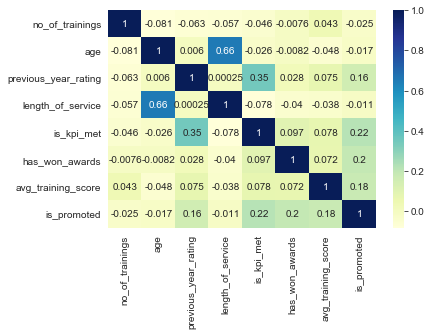

In [208]:
# Compute the correlation matrix
correlations = df.corr()
correlations
# Obsrvation: 
# Age and Length of service has a good correlation of 0.657111. 
# But then both these features - age and length_of_service don't seem to have any correlation with the target - is_promoted.
# no_of_trainings as well has poor correlation with target - is_promoted column.

# plot correlation matrix
sns.heatmap(correlations,cmap="YlGnBu",annot=True)

In [209]:
def correlaton_summary(correlations):
    correlation_df = pd.DataFrame(correlations['is_promoted'])
    correlation_df.columns = ["Correlation"]
    correlation_df = correlation_df.sort_values(by=['Correlation'], ascending=False)
    return correlation_df

correlaton_summary(correlations)

,Correlation
is_promoted,1.000000
is_kpi_met,0.221582
has_won_awards,0.195871
avg_training_score,0.181147
previous_year_rating,0.159320
length_of_service,-0.010670
age,-0.017166
no_of_trainings,-0.024896


In [210]:
df.fillna(value={'previous_year_rating':3}, inplace=True)
df.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
is_kpi_met                 0
has_won_awards             0
avg_training_score         0
is_promoted                0
dtype: int64

,Correlation
is_promoted,1.000000
score,0.305814
is_kpi_met,0.221582
has_won_awards,0.195871
avg_training_score,0.181147
previous_year_rating,0.153230
length_of_service,-0.010670
age,-0.017166
no_of_trainings,-0.024896


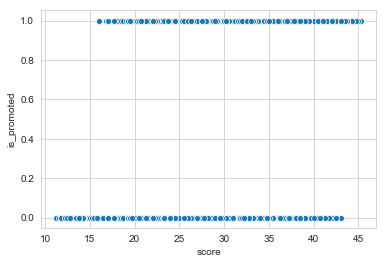

In [217]:
# Feature Engineering

def score(df):
    df['score'] = (7.5 * df['is_kpi_met']) + (5.5 * df['has_won_awards']) + (1.5 * df['previous_year_rating']) + (.25 * df['avg_training_score'])
#     df['score'] = np.ceil(df['score'] / 6) # where 6 is the SD of 'score' column
#     df['score'].astype(np.int64)
#     df['score3'] = np.log(df['score'])
    return df

sns.scatterplot(x='score', y='is_promoted', data=df)

correlaton_summary( score(df).corr() )

In [218]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,1.253011,0.609264,1.00,1.00,1.0,1.00,10.00
age,54808.0,34.803915,7.660169,20.00,29.00,33.0,39.00,60.00
previous_year_rating,54808.0,inf,1.214844,1.00,3.00,3.0,4.00,5.00
length_of_service,54808.0,5.865512,4.265094,1.00,3.00,5.0,7.00,37.00
is_kpi_met,54808.0,0.351974,0.477590,0.00,0.00,0.0,1.00,1.00
has_won_awards,54808.0,0.023172,0.150450,0.00,0.00,0.0,0.00,1.00
avg_training_score,54808.0,63.386750,13.371559,39.00,51.00,60.0,76.00,99.00
is_promoted,54808.0,0.085170,0.279137,0.00,0.00,0.0,0.00,1.00
score,54808.0,23.570660,6.018453,11.25,18.75,23.0,27.75,45.25


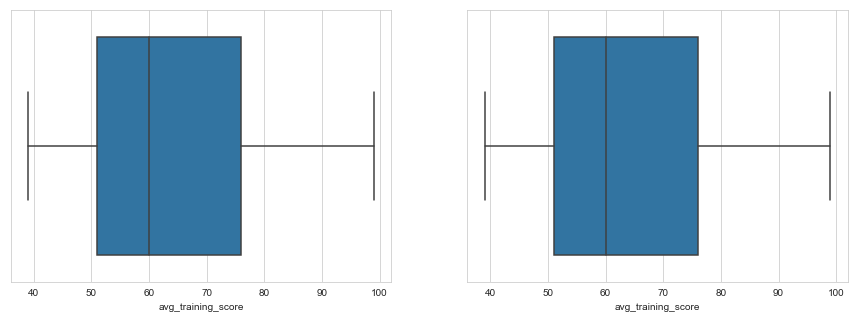

In [237]:
f = plt.figure(figsize=(15,5))

# Train-dataset
ax = f.add_subplot(1, 2, 1)
sns.boxplot(x=df['avg_training_score'])

#Test-datasest
f.add_subplot(1, 2, 2)
sns.boxplot(x=test['avg_training_score'])

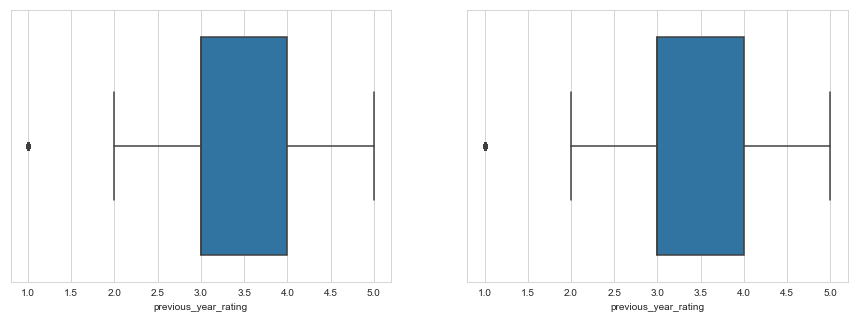

In [235]:
f = plt.figure(figsize=(15,5))

# Train-dataset
ax = f.add_subplot(1, 2, 1)
sns.boxplot(x=df['previous_year_rating'])

#Test-datasest
f.add_subplot(1, 2, 2)
sns.boxplot(x=test['previous_year_rating'])

In [247]:
print(df[df.previous_year_rating<2].shape[0])
print(test[test.previous_year_rating<2].shape[0])
# df[df.previous_year_rating<2]

6223
2680


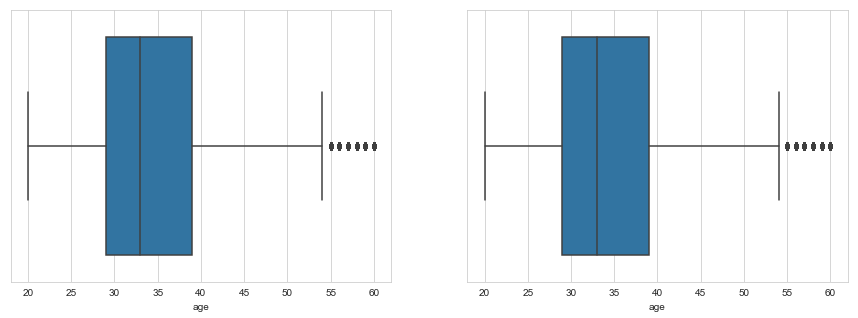

In [236]:
f = plt.figure(figsize=(15,5))

# Train-dataset
ax = f.add_subplot(1, 2, 1)
sns.boxplot(x=df['age'])

#Test-datasest
f.add_subplot(1, 2, 2)
sns.boxplot(x=test['age'])    

In [222]:
print(df[df.age>=50].shape[0])
print(test[test.age>=50].shape[0])

3373
1453


## Data Modeling

In [223]:
class RatingsImputer(BaseEstimator, TransformerMixin):
    def fit (self, X, y=None, **fit_params):
        return self
    
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        #X.loc[X.previous_year_rating.isnull(), 'previous_year_rating'] = 0
        X = X.fillna({'previous_year_rating':3.0}) # 3.0 is the mean and median value
        return X

# fillna_pipe.fit_transform(df).isnull().sum() # For Testing purpose only

In [224]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
    
    def fit (self, X, y=None, **fit_params):
        return self
    
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("The DataFrame does not include the columns: %s" % cols_error)

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using LabelEncoder(). 
        If no columns specified, transforms all columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [241]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures

select_columns = ['is_kpi_met', 'has_won_awards', 'previous_year_rating', 'score'] # Removing 'education', 'previous_year_rating'. Adding 'score'
select_numeric_cols = ['has_won_awards', 'is_kpi_met', 'previous_year_rating', 'score']
# select_categorical_cols = ['education']
select_categorical_cols = []

# fillna_pipe = make_pipeline(RatingsImputer(), EducationCleanser())
fillna_pipe = make_pipeline(RatingsImputer())
select_categorical_cols_pipe = make_pipeline(ColumnSelector(columns=select_categorical_cols), MultiColumnLabelEncoder())
select_numeric_cols_pipe = make_pipeline(ColumnSelector(columns=select_numeric_cols),RobustScaler())

# select_fu = make_union(select_numeric_cols_pipe, select_categorical_cols_pipe)
# select_pipe = make_pipeline(fillna_pipe, select_fu)
select_pipe = make_pipeline(fillna_pipe, select_numeric_cols_pipe)
# select_pipe = make_pipeline(Imputer(strategy='median'), PolynomialFeatures(degree=2), select_fu)
# select_pipe = make_pipeline(fillna_pipe, select_fu, PolynomialFeatures(degree=2))

# Do FIT_TRANSFORM again based on selected columns after correlation
train_vec = select_pipe.fit_transform(df[select_columns])
print(train_vec.shape)
print(train_vec[:3])

(54808, 3)
[[ 1.          0.          0.47222222]
 [ 0.          0.         -0.05555556]
 [ 0.          0.         -0.66666667]]


In [242]:
# Split train data-set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_vec, 
                                                    df['is_promoted'], 
                                                    train_size = 0.75, 
                                                    random_state = 42)

In [243]:
test.fillna(value={'previous_year_rating':3}, inplace=True)
score(test)
test_vec = select_pipe.transform(test[select_columns])
test_vec[:5]

array([[ 1.        ,  0.        ,  0.91666667],
       [ 0.        ,  0.        , -0.63888889],
       [ 0.        ,  0.        , -1.08333333],
       [ 0.        ,  0.        , -0.41666667],
       [ 0.        ,  0.        , -0.19444444]])

## RBFClassifier (SVC Classifier with RBF Kernel)

In [245]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate

# Ref.: https://stackoverflow.com/questions/37413302/f1-score-of-all-classes-from-scikits-cross-val-score
# Ref.: https://stackoverflow.com/questions/35876508/evaluate-multiple-scores-on-sklearn-cross-val-score
svc_clf = SVC(random_state=42, kernel='rbf', degree=5, decision_function_shape='ovo', gamma=175, C=25.5)
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}
# scores = cross_val_score(svc_clf, x_train, y_train, cv=3, scoring='precision')
# scores = cross_val_score(svc_clf, x_train, y_train, cv=3, scoring='recall')
scores = cross_val_score(svc_clf, x_train, y_train, cv=3, scoring='f1')
# scores = cross_validate(svc_clf, x_train, y_train, cv=3, scoring=scoring)
scores # Check against the recall score, for this is something the  Public LeaderBoard is scoring against.

array([0.17713853, 0.2095941 , 0.19896831])

In [233]:
from sklearn.metrics import classification_report, confusion_matrix

svc_clf.fit(x_train, y_train)
preds = svc_clf.predict(x_test)

print('Accuracy = ', np.mean(preds == y_test))

creport = classification_report(y_test, preds, target_names=['Not Promoted', 'Promoted'])
print(creport)

confusion_matrix(y_test, preds)

Accuracy =  0.9306670559042476
              precision    recall  f1-score   support

Not Promoted       0.93      1.00      0.96     12571
    Promoted       0.88      0.19      0.31      1131

 avg / total       0.93      0.93      0.91     13702



array([[12542,    29],
       [  921,   210]], dtype=int64)

In [ ]:
def conv2df(preds):
    df = pd.DataFrame(data={
        'employee_id': test.index.values,
        'is_promoted': preds
    })
    df['is_promoted'] = df['is_promoted'].astype(np.int8)
    return df

In [ ]:
conv2df(svm_clf.predict(test_vec)).to_csv('data/output/SVC_RBF_default.csv', index=False)

## Possible areas of improvement
* Is there a better  way to fill missing values for the 'education' column???
* Education seem to have very less correlation. Why not remove it?